
## RNN Multiple Feature inputs to predict silicon


In [1]:

import pandas as pd
import numpy as np


In [2]:

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [3]:

import matplotlib 
## import pytorch_lightning as pl
import torch 

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable


In [4]:

## Requires Python = 3.9


In [5]:

for_RNN_data_CIVS = pd.read_csv('merged_seq_5998_CIVS.csv')


In [6]:

for_RNN_data_CIVS.head(5)


,pd_index,date_f1,CNUM,LNUM_f1,SI_f1,S_f1,MN_f1,P_f1,CU_f1,NI_f1,...,Cast_Avg_Ti_f2,Slag_Fe_f2,Slag_SiO2_f2,Slag_Al2O3_f2,Slag_CaO_f2,Slag_MgO_f2,Slag_S_f2,Slag_K2O_f2,Slag_B_SiO2_f2,Slag_TiO2_f2
0,0,44409,2809,182,1.152,0.042,0.577,0.077,0.003,0.020,...,0.032,0.05,38.709999,7.37,37.610001,10.59,1.06,0.38,1.25,0.41
1,1,44409,2809,171,0.932,0.053,0.521,0.071,0.003,0.015,...,0.032,0.05,38.709999,7.37,37.610001,10.59,1.06,0.38,1.25,0.41
2,2,44409,2809,122,1.059,0.043,0.540,0.076,0.003,0.020,...,0.032,0.05,38.709999,7.37,37.610001,10.59,1.06,0.38,1.25,0.41
3,3,44409,2810,147,0.917,0.059,0.478,0.072,0.003,0.017,...,0.024,0.05,36.020000,6.70,37.209999,9.71,1.15,0.30,1.30,0.34
4,4,44409,2810,190,1.023,0.054,0.508,0.072,0.003,0.012,...,0.024,0.05,36.020000,6.70,37.209999,9.71,1.15,0.30,1.30,0.34


In [7]:

for_RNN_data_CIVS.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5998 entries, 0 to 5997
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pd_index                5998 non-null   int64  
 1   date_f1                 5998 non-null   int64  
 2   CNUM                    5998 non-null   int64  
 3   LNUM_f1                 5998 non-null   int64  
 4   SI_f1                   5489 non-null   float64
 5   S_f1                    5479 non-null   float64
 6   MN_f1                   5998 non-null   float64
 7   P_f1                    5998 non-null   float64
 8   CU_f1                   5998 non-null   float64
 9   NI_f1                   5998 non-null   float64
 10  CR_f1                   5998 non-null   float64
 11  MO_f1                   5998 non-null   float64
 12  TI_f1                   5998 non-null   float64
 13  HM_Temp_f1              5998 non-null   int64  
 14  ProbeSi_f1              6 non-null      

In [8]:

## for_RNN_data_CIVS.plot()


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

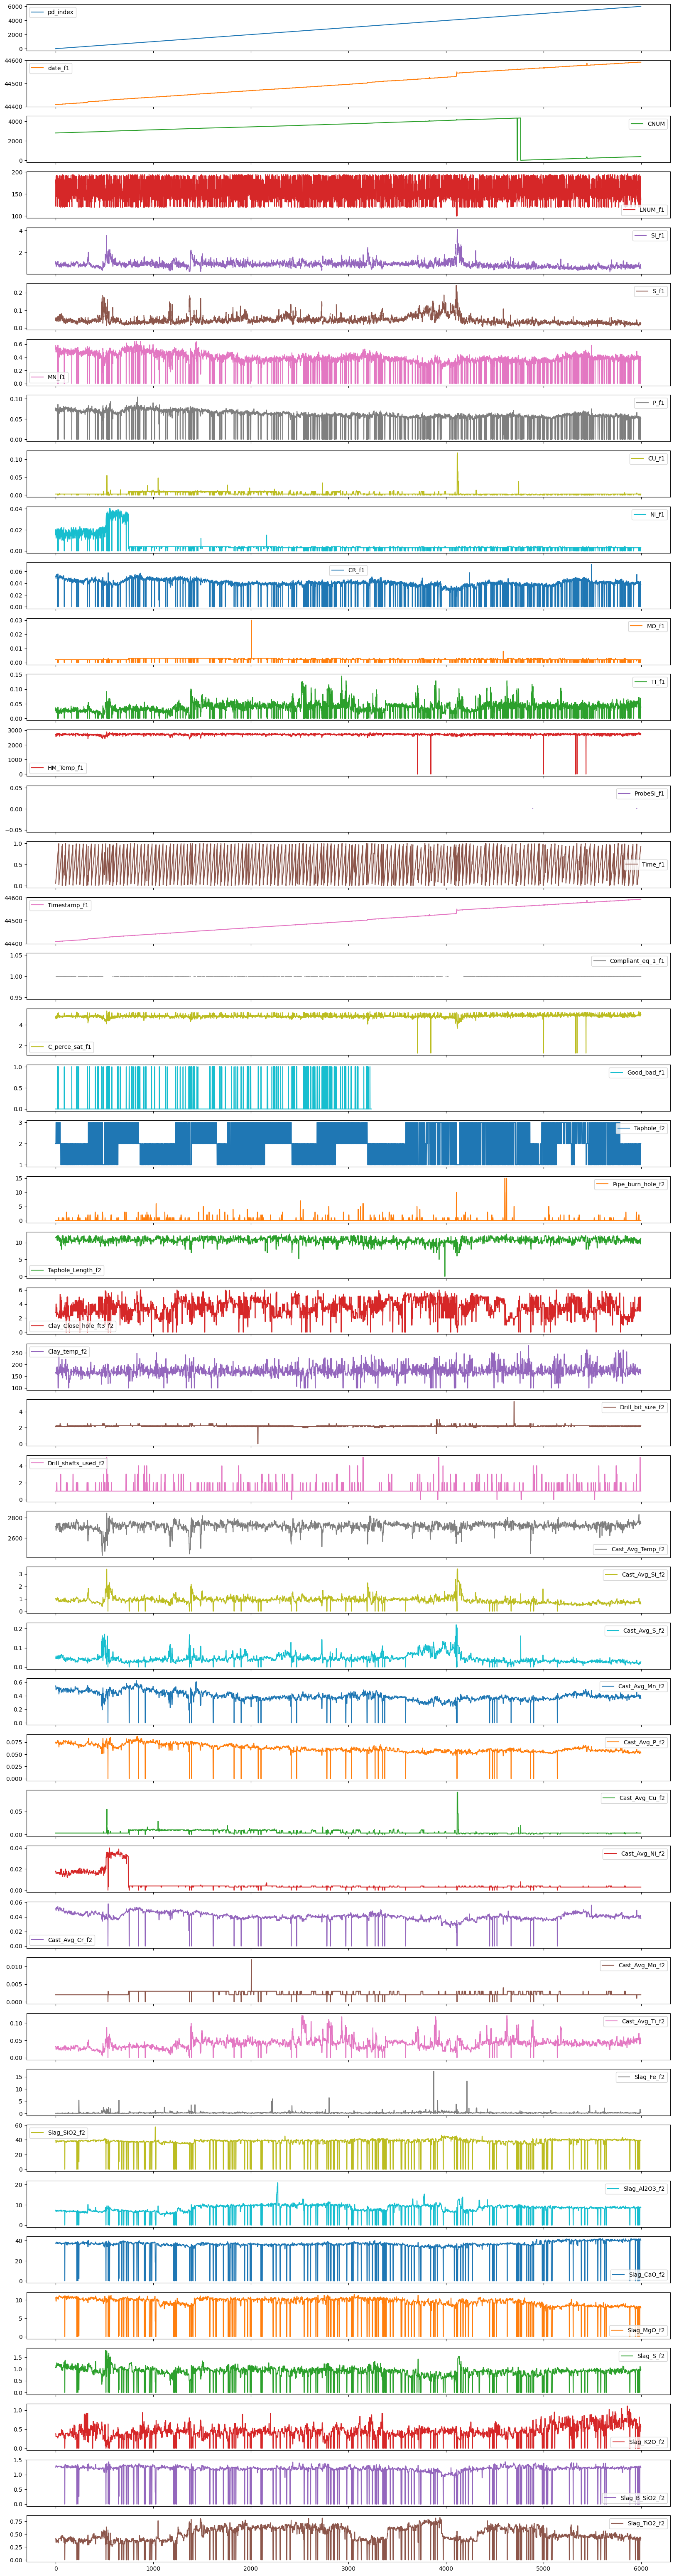

In [9]:

for_RNN_data_CIVS.plot( figsize=(20,80),  subplots=True   )


In [10]:

for_RNN_data_CIVS


,pd_index,date_f1,CNUM,LNUM_f1,SI_f1,S_f1,MN_f1,P_f1,CU_f1,NI_f1,...,Cast_Avg_Ti_f2,Slag_Fe_f2,Slag_SiO2_f2,Slag_Al2O3_f2,Slag_CaO_f2,Slag_MgO_f2,Slag_S_f2,Slag_K2O_f2,Slag_B_SiO2_f2,Slag_TiO2_f2
0,0,44409,2809,182,1.152,0.042,0.577,0.077,0.003,0.020,...,0.032,0.05,38.709999,7.37,37.610001,10.59,1.06,0.38,1.25,0.41
1,1,44409,2809,171,0.932,0.053,0.521,0.071,0.003,0.015,...,0.032,0.05,38.709999,7.37,37.610001,10.59,1.06,0.38,1.25,0.41
2,2,44409,2809,122,1.059,0.043,0.540,0.076,0.003,0.020,...,0.032,0.05,38.709999,7.37,37.610001,10.59,1.06,0.38,1.25,0.41
3,3,44409,2810,147,0.917,0.059,0.478,0.072,0.003,0.017,...,0.024,0.05,36.020000,6.70,37.209999,9.71,1.15,0.30,1.30,0.34
4,4,44409,2810,190,1.023,0.054,0.508,0.072,0.003,0.012,...,0.024,0.05,36.020000,6.70,37.209999,9.71,1.15,0.30,1.30,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5993,5993,44592,379,120,0.795,0.019,0.397,0.054,0.003,0.003,...,0.052,0.51,39.639999,8.66,41.150002,8.27,0.93,0.63,1.25,0.44
5994,5994,44592,379,121,NaN,NaN,0.000,0.000,0.000,0.000,...,0.052,0.51,39.639999,8.66,41.150002,8.27,0.93,0.63,1.25,0.44
5995,5995,44592,380,163,0.598,0.025,0.383,0.054,0.003,0.003,...,0.041,0.32,39.090000,8.67,40.560001,7.86,0.99,0.56,1.24,0.42
5996,5996,44592,380,146,0.608,0.030,0.351,0.052,0.003,0.003,...,0.041,0.32,39.090000,8.67,40.560001,7.86,0.99,0.56,1.24,0.42


In [11]:

for_RNN_data_CIVS['date_f2'][1000:1400]


1000     9/2/2021 0:00
1001     9/2/2021 0:00
1002     9/2/2021 0:00
1003     9/2/2021 0:00
1004     9/2/2021 0:00
             ...      
1395    9/13/2021 0:00
1396    9/13/2021 0:00
1397    9/13/2021 0:00
1398    9/13/2021 0:00
1399    9/13/2021 0:00
Name: date_f2, Length: 400, dtype: object


## Create datasets of selected features


In [12]:

def one_step_forecast(df, window):
    d = df.values
    x = []
    n = len(df)
    idx = df.index[:-window]
    for start in range(n-window):
        end = start + window
        x.append(d[start:end])
    cols = [f'x_{i}' for i in range(1, window+1)]
    x = np.array(x).reshape(n-window, -1)
    y = df.iloc[window:].values
    df_xs = pd.DataFrame(x, columns=cols, index=idx)
    df_y = pd.DataFrame(y.reshape(-1), columns=['y'], index=idx)
    return pd.concat([df_xs, df_y], axis=1).dropna()



## Select the features and the y


In [13]:

## my_5_cols = [ 'date_f2', 'SI_f1', 'HM_Temp_f1', 'Slag_CaO_f2', 'C_perce_sat_f1' ]

my_4_cols = [  'SI_f1', 'HM_Temp_f1', 'Slag_CaO_f2', 'C_perce_sat_f1' ]

df_4_cols = for_RNN_data_CIVS.loc[:, my_4_cols ]

## df_4_cols = df_4_cols[:20]

df_4_cols


,SI_f1,HM_Temp_f1,Slag_CaO_f2,C_perce_sat_f1
0,1.152,2677,37.610001,4.692156
1,0.932,2729,37.610001,4.830898
2,1.059,2736,37.610001,4.804690
3,0.917,2557,37.209999,4.587464
4,1.023,2705,37.209999,4.768184
...,...,...,...,...
5993,0.795,2765,41.150002,4.940506
5994,NaN,2772,41.150002,5.211540
5995,0.598,2746,40.560001,4.973084
5996,0.608,2748,40.560001,4.970318


In [14]:

def window_seq_conversion_multi_feature(df, window, target_index):
    d = df.values
    ## print( d )
    ## print( d.shape )
    x = []
    n = len(df)
    n_features = df.shape[1]
    ## print(n)
    idx = df.index[ : -window]
    ## print(idx)
    ## print(  idx.shape  )
    for start in range(n-window):
        end = start + window
        ## print(start, "....", end)
        x.append( d[ start:end, : ] )
    ## print(x)
    cols = [ f'x_{i}_f_{j}' for i in range(1, window+1) for j in range(0, n_features)]
    ## print(  cols  )
    x = np.array(x)
    ## print(x.shape)
    x = np.array(x).reshape(n-window, -1)
    ## print(x.shape)

    y = df.iloc[ window: , target_index ].values
    ## print( y.shape )
    ## print( y.reshape(-1).shape )

    df_xs = pd.DataFrame(x  , columns=cols,  index=idx)
    df_y  = pd.DataFrame(y  , columns=['y'], index=idx)
    ## print(df_y)
    return pd.concat( [df_xs, df_y], axis=1 ).dropna()

    



## RNN Important Parameters


In [15]:

window                = 3          ## seq length

silicon_feature_index = 0



## Make Data Sequential


In [16]:

##                   0            1             2              3
## my_4_cols = [  'SI_f1', 'HM_Temp_f1', 'Slag_CaO_f2', 'C_perce_sat_f1' ]



 
res_multi_feature_df = window_seq_conversion_multi_feature( df_4_cols, window,  silicon_feature_index )


In [17]:

res_multi_feature_df


,x_1_f_0,x_1_f_1,x_1_f_2,x_1_f_3,x_2_f_0,x_2_f_1,x_2_f_2,x_2_f_3,x_3_f_0,x_3_f_1,x_3_f_2,x_3_f_3,y
0,1.152,2677.0,37.610001,4.692156,0.932,2729.0,37.610001,4.830898,1.059,2736.0,37.610001,4.804690,0.917
1,0.932,2729.0,37.610001,4.830898,1.059,2736.0,37.610001,4.804690,0.917,2557.0,37.209999,4.587464,1.023
2,1.059,2736.0,37.610001,4.804690,0.917,2557.0,37.209999,4.587464,1.023,2705.0,37.209999,4.768184,0.967
3,0.917,2557.0,37.209999,4.587464,1.023,2705.0,37.209999,4.768184,0.967,2731.0,37.209999,4.818824,0.717
4,1.023,2705.0,37.209999,4.768184,0.967,2731.0,37.209999,4.818824,0.717,2718.0,37.209999,4.879920,0.843
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5982,0.737,2707.0,41.480000,4.874682,0.652,2735.0,41.480000,4.939178,0.613,2773.0,41.480000,5.008564,0.566
5983,0.652,2735.0,41.480000,4.939178,0.613,2773.0,41.480000,5.008564,0.566,2715.0,0.000000,4.941582,0.565
5984,0.613,2773.0,41.480000,5.008564,0.566,2715.0,0.000000,4.941582,0.565,2754.0,0.000000,4.990910,0.640
5989,0.675,2767.0,41.880001,4.981798,0.696,2792.0,41.880001,5.010442,0.915,2770.0,41.880001,4.911408,0.646


In [18]:

print( res_multi_feature_df.shape )


(4414, 13)



## Drop desired columns from Sequential Data Frame (such as silicon from X)


In [19]:

df = res_multi_feature_df

df.drop(  list(   df.filter(regex='_f_0')   ), axis=1, inplace=True)

no_silicon_in_seq_X_df = df

print( df.shape )



(4414, 10)


In [20]:

print( res_multi_feature_df.shape )


(4414, 10)


In [21]:

res_multi_feature_df


,x_1_f_1,x_1_f_2,x_1_f_3,x_2_f_1,x_2_f_2,x_2_f_3,x_3_f_1,x_3_f_2,x_3_f_3,y
0,2677.0,37.610001,4.692156,2729.0,37.610001,4.830898,2736.0,37.610001,4.804690,0.917
1,2729.0,37.610001,4.830898,2736.0,37.610001,4.804690,2557.0,37.209999,4.587464,1.023
2,2736.0,37.610001,4.804690,2557.0,37.209999,4.587464,2705.0,37.209999,4.768184,0.967
3,2557.0,37.209999,4.587464,2705.0,37.209999,4.768184,2731.0,37.209999,4.818824,0.717
4,2705.0,37.209999,4.768184,2731.0,37.209999,4.818824,2718.0,37.209999,4.879920,0.843
...,...,...,...,...,...,...,...,...,...,...
5982,2707.0,41.480000,4.874682,2735.0,41.480000,4.939178,2773.0,41.480000,5.008564,0.566
5983,2735.0,41.480000,4.939178,2773.0,41.480000,5.008564,2715.0,0.000000,4.941582,0.565
5984,2773.0,41.480000,5.008564,2715.0,0.000000,4.941582,2754.0,0.000000,4.990910,0.640
5989,2767.0,41.880001,4.981798,2792.0,41.880001,5.010442,2770.0,41.880001,4.911408,0.646



## Utility Functions


In [22]:

class Standardize:
    
    def __init__(self, df, split=0.10):
        self.data  = df
        self.split = split
    
    def split_data(self):
        n           = int( len( self.data ) * self.split )
        train       = self.data.iloc[   :-n ] 
        test        = self.data.iloc[ -n:   ]
        n           = int( len(   train   ) * self.split )
        train       = train.iloc[   :-n ] 
        val         = train.iloc[ -n:   ]
        assert len(test) + len(train) + len(val) == len(self.data)
        return train, test, val
    
    def _transform(self, data):
        data_s = ( data - self.mu ) / self.sigma          
        return data_s
    
    def fit_transform(self):
        train, test, val    = self.split_data()
        self.mu             = train.mean() 
        self.sigma          = train.std()
        train_s             = self._transform( train )
        test_s              = self._transform( test  )
        val_s               = self._transform( val   )
        return train_s, test_s, val_s
    
    def inverse(self,   data):
        return ( data * self.sigma     ) + self.mu          ## all data
        
    def inverse_y(self, data):
        return ( data * self.sigma[-1] ) + self.mu[-1]      ## last one


In [23]:

scale_civs = Standardize(  res_multi_feature_df , split=0.20 )


In [24]:

train_si, test_si, val_si = scale_civs.fit_transform()


In [25]:

#   0.487870	,  0.390889, 	0.370431, 	-0.097267
#  -0.047541,  0.249238,	    0.369629,	 0.210778
#   0.882512, -0.794884,	    0.372065,	-1.358794


In [26]:

train_si


,x_1_f_1,x_1_f_2,x_1_f_3,x_2_f_1,x_2_f_2,x_2_f_3,x_3_f_1,x_3_f_2,x_3_f_3,y
0,-0.794884,0.372065,-1.358794,0.249238,0.369629,0.210778,0.390889,0.370431,-0.097267,-0.103014
1,0.252118,0.372065,0.218842,0.392070,0.369629,-0.093018,-3.284923,0.327762,-2.605599,0.337822
2,0.393060,0.372065,-0.079169,-3.260352,0.326943,-2.611037,-0.245704,0.327762,-0.518805,0.104928
3,-3.211042,0.329872,-2.549247,-0.240472,0.326943,-0.516184,0.288213,0.327762,0.065940,-0.934782
4,-0.231114,0.329872,-0.494279,0.290047,0.326943,0.070819,0.021255,0.327762,0.771422,-0.410768
...,...,...,...,...,...,...,...,...,...,...
3623,0.010502,0.154769,0.023556,-0.179259,0.149798,-0.145111,0.452495,0.150689,0.367296,-0.169556
3624,-0.170710,0.154769,-0.130271,0.453284,0.149798,0.373340,0.206072,0.150689,0.231318,0.246328
3625,0.453464,0.154769,0.378309,0.208429,0.149798,0.236836,0.144466,0.028019,-0.129345,0.238010
3626,0.211848,0.154769,0.244404,0.147215,0.027076,-0.125220,0.390889,0.028019,0.033585,-0.053108



## Some Sanity Checks


In [27]:

print( scale_civs.split)


0.2


In [28]:

print(f'''
SI: train: { len(train_si) } , val:{ len(val_si) }, test: { len(test_si) } 
''')



SI: train: 2826 , val:706, test: 882 



In [29]:

numpy_array = train_si.values
type(numpy_array)


numpy.ndarray

In [30]:

torch_tensor = torch.from_numpy(numpy_array)
type(torch_tensor)


torch.Tensor

In [31]:

from_torch_to_numpy = torch_tensor.detach().numpy()
type(from_torch_to_numpy)


numpy.ndarray


## Convert to Torch tensors Option 1


In [32]:

def Convert_to_RNN_tensors( list_data_civs ):
    
    y = [ torch.from_numpy(  col.iloc[ :,  -1 ].values.reshape(-1,1)                         ).float()   for col in list_data_civs ]
    x = [ torch.from_numpy(  col.iloc[ :, :-1 ].values.reshape( *col.iloc[ :, :-1 ].shape )  ).float()   for col in list_data_civs ]
    
    return y, x
  

In [33]:

list_data_civs = [ train_si, val_si, test_si ]

y, x           = Convert_to_RNN_tensors(   list_data_civs  )


In [34]:

y_train_si = y[0]
y_val_si   = y[1]
y_test_si  = y[2]
x_train_si = x[0]
x_val_si   = x[1]
x_test_si  = x[2]


In [35]:

print( y_train_si.shape )
print(   y_val_si.shape ) 
print(  y_test_si.shape ) 
print( x_train_si.shape )
print(   x_val_si.shape )
print(  x_test_si.shape )


torch.Size([2826, 1])
torch.Size([706, 1])
torch.Size([882, 1])
torch.Size([2826, 9])
torch.Size([706, 9])
torch.Size([882, 9])



## Convert to torch tensors Option 2


In [36]:

def features_target_pt(*args):
    
    y = [ torch.from_numpy( col.pop('y').values.reshape(-1,1) ).float()          for col in args ]
    
    x = [ torch.from_numpy(          col.values.reshape(*col.shape)    ).float() for col in args ]
    
    return *y, *x


In [37]:

( y_train_si, 
    y_val_si, 
   y_test_si, 
  x_train_si, 
    x_val_si, 
   x_test_si ) = features_target_pt(  train_si,  val_si,  test_si   )


In [38]:

print( y_train_si.shape )
print(   y_val_si.shape ) 
print(  y_test_si.shape ) 
print( x_train_si.shape )
print(   x_val_si.shape )
print(  x_test_si.shape )
   

torch.Size([2826, 1])
torch.Size([706, 1])
torch.Size([882, 1])
torch.Size([2826, 9])
torch.Size([706, 9])
torch.Size([882, 9])



## Parameters (set these manually)


In [39]:

params_si = {
'seq_length': 3,       ## this is the window
'input_size': 3,  ## 4,            ## x input size -> my_4_cols = [  'SI_f1', 'HM_Temp_f1', 'Slag_CaO_f2', 'C_perce_sat_f1' ]
'output_size':1,
'units':32,                 ## neurons in hidden layers
'n_layers':1,
'epochs': 500,
'print_every': 25,
'lr': 0.01,
'train_data': (x_train_si, y_train_si),
'val_data':     (x_val_si, y_val_si),
'test_data':   (x_test_si, y_test_si),
'idx': test_si.index,                        ## needed for validation, use test set here
'scale': scale_civs
}



plt.rcParams["figure.figsize"] = [14, 5] 



## Training Function


In [40]:

def train_model_pt(model_type='RNN', **kwargs):
    """
    Parameters:
        input_size: input size
        output_size: output size
        n_features: number of features (hidden dimension)
        n_layers: number of layers
        train_data: tuple ex (x_train, y_train)
        val_data: tuple ex (x_val, y_val)
        epochs: number of epochs
        print_every: output and history tracking
        lr: learning rate
    """
    if model_type=='RNN':
        model = RNN(kwargs['seq_length'],
                    kwargs['input_size'], 
                    kwargs['output_size'], 
                    kwargs['units'], 
                    kwargs['n_layers'])
    elif model_type=='LSTM':
        model = LSTM(kwargs['seq_length'],
                     kwargs['input_size'], 
                     kwargs['output_size'], 
                     kwargs['units'], 
                     kwargs['n_layers'])
    elif model_type=='GRU':
         model = LSTM(kwargs['seq_length'],
                      kwargs['input_size'], 
                      kwargs['output_size'], 
                      kwargs['units'], 
                      kwargs['n_layers'])
        
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=kwargs['lr'])
    
    x_train, y_train = kwargs['train_data']
    x_val, y_val     = kwargs['val_data']
    x_test, y_test   = kwargs['test_data']
    
    history = {'loss': [], 'val_loss': []}
    # batch_size = x_train.shape[0]
    model.train()
    epochs      = kwargs['epochs']
    print_every = kwargs['print_every']
    
    for batch_i, epoch in enumerate(range(epochs)):

        
        h = model.init_hidden( x_train.shape[0])
        optimizer.zero_grad()
        
        pred, h = model( x_train, h )   #model(x_train)
        #hidden = hidden.data
  
        loss    = criterion(pred, y_train)        
        loss.backward()
        optimizer.step()
        
        if batch_i % print_every == 0:
            model.eval()
            with torch.no_grad():
                val_h        = model.init_hidden( x_val.shape[0] )
                val_p, val_h = model(x_val, val_h)
                val_loss     = criterion(val_p, y_val)
                history['val_loss'].append(val_loss.item())
            model.train()
            history['loss'].append(loss.item())
            print(f'{batch_i}/{epochs} - Loss:  {loss.item()}, val_loss: {val_loss.item()}')
    
    ## Prediction
    model.eval()
    with torch.no_grad():
        h0    = model.init_hidden( x_test.shape[0] )
        y_hat = model(x_test, h0)
        
    y_hat, _ = y_hat
    mse_loss_air = criterion(y_hat, y_test)
    print(f'Test MSE Loss: {mse_loss_air.item():.4f}')
    
    ## Plotting
    fig, ax = plt.subplots(2, 1) 

    ax[0].set_title(f'{model_type}: Loss and Validation Loss per epoch')
    ax[0].plot(history['loss'], 'k--', label='loss')
    ax[0].plot(history['val_loss'], 'k', label='val_loss')
    ax[0].legend()
    ax[1].set_title(f"{model_type} TEST MSE = {mse_loss_air.item():.4f}: Forecast vs Actual (Out-of-Sample data)")
    scale = kwargs['scale']
    actual = scale.inverse_y(y_test.detach().numpy().ravel())
    pred   = scale.inverse_y( y_hat.detach().numpy().ravel())
    idx = kwargs['idx']
    ##pd.Series(actual, index=idx).plot(style='k--', label='actual', alpha=0.65, color='blue')
    ##pd.Series(pred,   index=idx).plot(style='k',   label='forecast' , color='red')
    pd.Series(actual, index=idx).plot( label='actual',    color='blue')
    pd.Series(pred,   index=idx).plot( label='forecast' , color='red' )
    fig.tight_layout()
    ax[1].legend(); plt.show()
    
    return model, history



## Normal RNN


In [41]:

## n_features: number of features (hidden dimension)

class RNN(nn.Module):
    
    def __init__(self, seq_length, input_size, output_size, n_features, n_layers):
        super(RNN, self).__init__()
        self.n_layers   = n_layers
        self.output_size= output_size
        self.hidden_dim = n_features
        self.seq_length = seq_length
        self.input_size = input_size
        ## rnn_basic_rc = nn.RNN(   vector_size, hidden_size,  n_layers  )
        self.rnn        = nn.RNN(input_size, n_features, n_layers,  batch_first=False)
        self.dropout    = nn.Dropout(0.2)
        self.fc         = nn.Linear(n_features, output_size)
        
    def forward(self, x, hn):
        ## print(x.shape)
        ##                    3                4
        x = x.view(-1, self.seq_length, self.input_size)
        ## print(x.shape)
        ## print( x[0, :, :])
        ## torch.Size([2826, 12 ])
        ## torch.Size([706,  12 ])
        ## torch.Size([882,  12 ])
        ## x comes in as [ batch_n, 3, 4]
        ## first reshape to [ batch_n, 3, 4 ], then
        ## with batch_first=false, need to reshape to 
        ##    (   seq_len,  batch_size,    vector_size)
        ## -> (seq_length,  batch_size,     input_size)
        
        ## x = x.view(x.shape[1], x.shape[0], x.shape[2])

        x = x.permute(1, 0, 2)

        ## print(x.shape)
        ## input()
        
        rnn_o, hn = self.rnn(x, hn)
  
        rnn_o     = self.dropout(rnn_o)
        
        # reshape
        ## rnn_o  = rnn_o.view(-1, self.hidden_dim)
      
        output = self.fc( hn )
    
        ##                     batch_size, n_classes) 
        output  = output.view( -1,  self.output_size ) 
        
        return output, hn

    def init_hidden(self, batch_size_x_data):
        ## hidden has shape (n_layers  , batch_size, rnn_hidden_size)
        ##                  (  n_layers, batch_size, rnn_hidden_size)
        ## hidden_rc   = torch.zeros( 1,   N_batches_rc,         128)
        
        weight = next( self.parameters() ).data
        hidden = weight.new(   self.n_layers, 1, self.hidden_dim).zero_()
        N_batches_rc = batch_size_x_data    ## or is this the size of the x set ??
        hidden2 = torch.zeros( self.n_layers,   N_batches_rc,    self.hidden_dim )
        return hidden2



## Training Loop and Evaluation


0/500 - Loss:  1.1209633350372314, val_loss: 0.660437285900116
25/500 - Loss:  0.4358431398868561, val_loss: 0.41611674427986145
50/500 - Loss:  0.3955604135990143, val_loss: 0.4051779806613922
75/500 - Loss:  0.38207510113716125, val_loss: 0.39707666635513306
100/500 - Loss:  0.37371981143951416, val_loss: 0.3928939700126648
125/500 - Loss:  0.3683701157569885, val_loss: 0.3929334878921509
150/500 - Loss:  0.3621935546398163, val_loss: 0.38756969571113586
175/500 - Loss:  0.35800614953041077, val_loss: 0.3875292241573334
200/500 - Loss:  0.3534233868122101, val_loss: 0.38286760449409485
225/500 - Loss:  0.35342875123023987, val_loss: 0.3829016387462616
250/500 - Loss:  0.3466065526008606, val_loss: 0.37877532839775085
275/500 - Loss:  0.34346866607666016, val_loss: 0.37711185216903687
300/500 - Loss:  0.3407176434993744, val_loss: 0.37370797991752625
325/500 - Loss:  0.33832016587257385, val_loss: 0.370469868183136
350/500 - Loss:  0.3338784873485565, val_loss: 0.36534732580184937
375

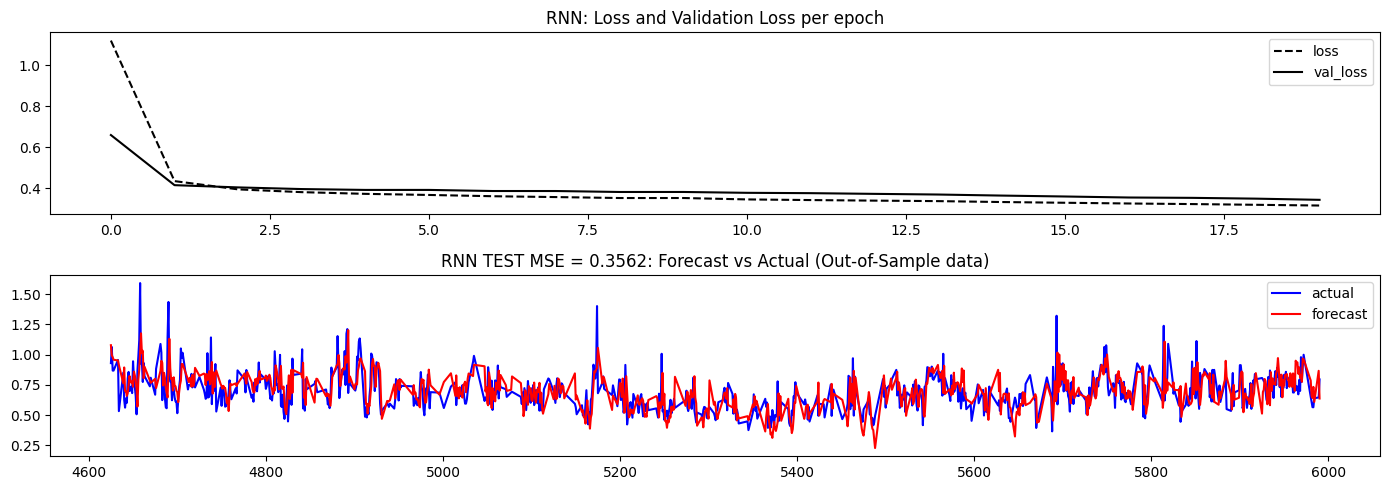

In [42]:

si_normal_rnn, history_normal_rnn = train_model_pt('RNN', **params_si)



## LSTM


In [43]:

class LSTM(nn.Module):
    def __init__(self, seq_length, input_size, output_size, n_features, n_layers):
        super(LSTM, self).__init__()
        self.n_layers   = n_layers
        self.hidden_dim = n_features
        self.output_size= output_size
        self.seq_length = seq_length
        self.input_size = input_size

        self.lstm    = nn.LSTM(input_size, n_features, n_layers, batch_first=False)
        self.dropout = nn.Dropout(0.2)
        self.fc      = nn.Linear(n_features, output_size)
        
    def forward(self, x, hn):
        x = x.view(-1, self.seq_length, self.input_size)
        x = x.permute(1, 0, 2)

        ## hn is a tuple here of (h0, c0)
        lstm_o, (hn, cn) = self.lstm(x, hn)
    
        lstm_o = self.dropout(lstm_o)

        # reshape
        ## lstm_o = lstm_o.view( -1, self.hidden_dim)
        
        output = self.fc( hn )
    
        ##                     batch_size, n_classes) 
        output  = output.view( -1,  self.output_size ) 
        
        return output, hn


    def init_hidden(self, batch_size_x_data):
        weight = next(self.parameters()).data
        hidden = ( weight.new(self.n_layers, 1, self.hidden_dim).zero_(),
                   weight.new(self.n_layers, 1, self.hidden_dim).zero_()   )
        N_batches_rc = batch_size_x_data    ## or is this the size of the x set ??
        hidden2 = ( torch.zeros( self.n_layers,   N_batches_rc,    self.hidden_dim ),
                    torch.zeros( self.n_layers,   N_batches_rc,    self.hidden_dim )    )
        return hidden2


0/500 - Loss:  1.002007007598877, val_loss: 0.6498439311981201
25/500 - Loss:  0.45448625087738037, val_loss: 0.4173351526260376
50/500 - Loss:  0.3861880600452423, val_loss: 0.41106805205345154
75/500 - Loss:  0.3705982267856598, val_loss: 0.3975415825843811
100/500 - Loss:  0.36016809940338135, val_loss: 0.3875540494918823
125/500 - Loss:  0.35035738348960876, val_loss: 0.3778230547904968
150/500 - Loss:  0.34037789702415466, val_loss: 0.36597830057144165
175/500 - Loss:  0.3287893533706665, val_loss: 0.3556348383426666
200/500 - Loss:  0.31616300344467163, val_loss: 0.34203606843948364
225/500 - Loss:  0.3037022650241852, val_loss: 0.3270871937274933
250/500 - Loss:  0.2900654375553131, val_loss: 0.3095569908618927
275/500 - Loss:  0.27515172958374023, val_loss: 0.2896784842014313
300/500 - Loss:  0.2596617341041565, val_loss: 0.2735530734062195
325/500 - Loss:  0.2455148845911026, val_loss: 0.25899896025657654
350/500 - Loss:  0.23163184523582458, val_loss: 0.24586953222751617
375/

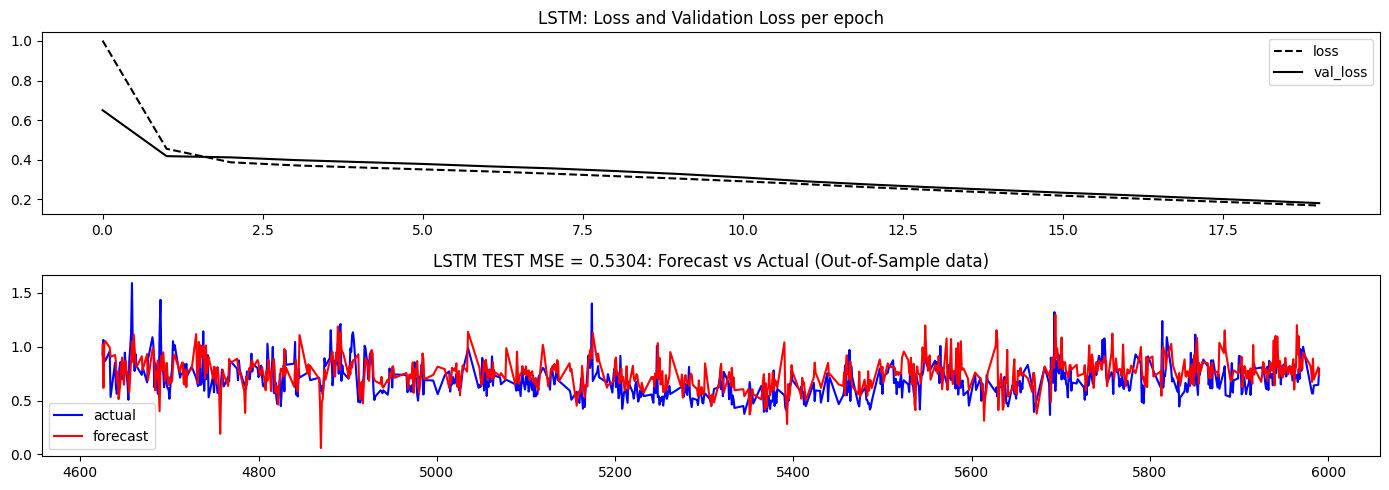

In [44]:

si_lstm, history_a_lstm = train_model_pt('LSTM', **params_si)



## LSTM with Dropout


In [45]:

class LSTM(nn.Module):
    def __init__(self, seq_length, input_size, output_size, n_features, n_layers):
        super(LSTM, self).__init__()
        self.n_layers   = n_layers
        self.hidden_dim = n_features
        self.output_size= output_size
        self.seq_length = seq_length
        self.input_size = input_size

        self.lstm = nn.LSTM(input_size, n_features, n_layers, batch_first=False, dropout=0.70)
        self.dropout = nn.Dropout(0.2)
        self.fc = nn.Linear(n_features, output_size)

        
    def forward(self, x, hn):
        x = x.view(-1, self.seq_length, self.input_size)
        x = x.permute(1, 0, 2)

        ## hn is a tuple here of (h0, c0)
        lstm_o, (hn, cn) = self.lstm(x, hn)

        lstm_o = self.dropout(lstm_o)
        # reshape
        #lstm_o = lstm_o.view(-1, self.hidden_dim)

        output = self.fc( hn )

         ##                     batch_size, n_classes) 
        output  = output.view( -1,  self.output_size ) 
        
        return output, hn

    def init_hidden(self, batch_size_x_data):
        weight = next(self.parameters()).data
        hidden = (weight.new(self.n_layers, 1, self.hidden_dim).zero_(),
                  weight.new(self.n_layers, 1, self.hidden_dim).zero_())
        N_batches_rc = batch_size_x_data    ## or is this the size of the x set ??
        hidden2 = ( torch.zeros( self.n_layers,   N_batches_rc,    self.hidden_dim ),
                    torch.zeros( self.n_layers,   N_batches_rc,    self.hidden_dim )    )
        return hidden2


0/500 - Loss:  1.0351511240005493, val_loss: 0.6616036295890808
25/500 - Loss:  0.4641505181789398, val_loss: 0.4244898855686188
50/500 - Loss:  0.39297473430633545, val_loss: 0.41425004601478577
75/500 - Loss:  0.37150558829307556, val_loss: 0.3976840376853943
100/500 - Loss:  0.3589826226234436, val_loss: 0.38846853375434875
125/500 - Loss:  0.3486974239349365, val_loss: 0.377313494682312
150/500 - Loss:  0.3387766182422638, val_loss: 0.3648585379123688
175/500 - Loss:  0.32882899045944214, val_loss: 0.35549771785736084
200/500 - Loss:  0.3170778155326843, val_loss: 0.3460032343864441
225/500 - Loss:  0.3048398494720459, val_loss: 0.3353077471256256
250/500 - Loss:  0.2930358946323395, val_loss: 0.3222496807575226
275/500 - Loss:  0.2807976305484772, val_loss: 0.30774885416030884
300/500 - Loss:  0.27287280559539795, val_loss: 0.2935274541378021
325/500 - Loss:  0.2591269016265869, val_loss: 0.27972233295440674
350/500 - Loss:  0.24974076449871063, val_loss: 0.2674179673194885
375/50

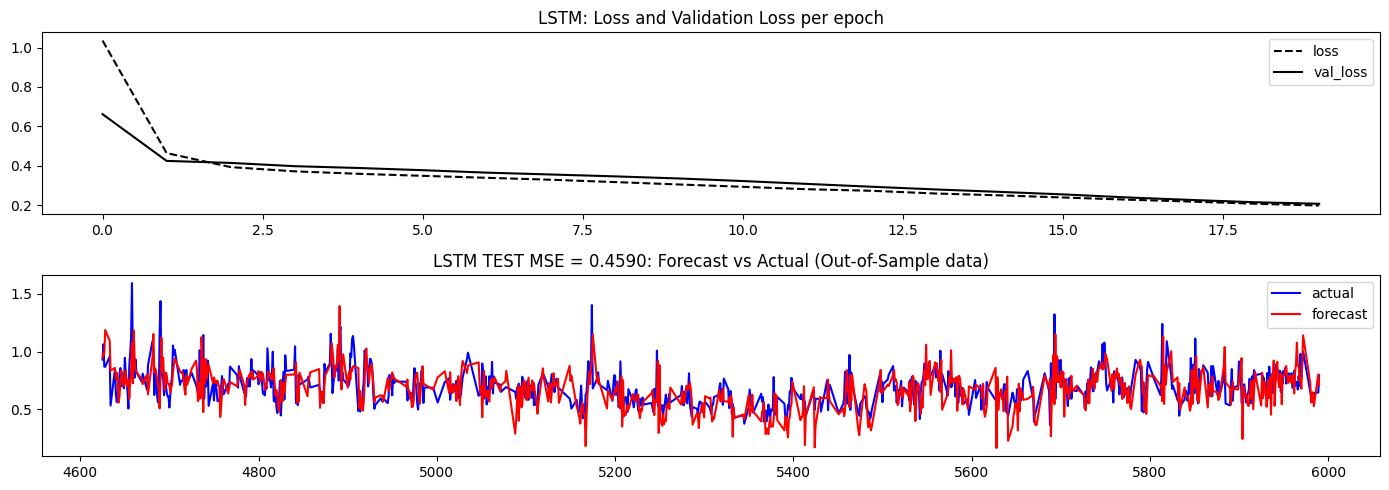

In [46]:

si_lstm_d, history_si_lstm_d = train_model_pt('LSTM', **params_si)



## GRU


In [47]:

class GRU(nn.Module):
    def __init__(self, seq_length, input_size, output_size, n_features, n_layers):
        super(GRU, self).__init__()
        self.n_layers   = n_layers
        self.hidden_dim = n_features
        self.output_size= output_size
        self.seq_length = seq_length
        self.input_size = input_size
        
        self.gru   = nn.GRU(input_size, n_features, n_layers, batch_first=False)
        self.dropout = nn.Dropout(0.2)
        self.fc = nn.Linear(n_features, output_size)

    
    def forward(self, x, hn):
        x = x.view(-1, self.seq_length, self.input_size)
        x = x.permute(1, 0, 2)

        gru_o, hn = self.gÇru(x, hn)
        gru_o  = self.dropout(gru_o)
      
        # reshape
        ## gru_o = gru_o.view(-1, self.hidden_dim)

        output = self.fc( hn )
   
        ##                     batch_size, n_classes) 
        output  = output.view( -1,  self.output_size ) 
        
        return output, hn
        

    def init_hidden(self, batch_size_x_data):
        weight = next(self.parameters()).data
        hidden = weight.new(self.n_layers, 1, self.hidden_dim).zero_()
        N_batches_rc = batch_size_x_data    ## or is this the size of the x set ??
        hidden2 = torch.zeros( self.n_layers,   N_batches_rc,    self.hidden_dim  )
        return hidden2


0/500 - Loss:  1.0065268278121948, val_loss: 0.6553525328636169
25/500 - Loss:  0.44857147336006165, val_loss: 0.4137636721134186
50/500 - Loss:  0.38882240653038025, val_loss: 0.40946030616760254
75/500 - Loss:  0.37087565660476685, val_loss: 0.3954175114631653
100/500 - Loss:  0.3594604730606079, val_loss: 0.3879774808883667
125/500 - Loss:  0.350361704826355, val_loss: 0.38057050108909607
150/500 - Loss:  0.3423634469509125, val_loss: 0.3751673996448517
175/500 - Loss:  0.3335842192173004, val_loss: 0.36620068550109863
200/500 - Loss:  0.3236550986766815, val_loss: 0.35744836926460266
225/500 - Loss:  0.31484007835388184, val_loss: 0.3488371968269348
250/500 - Loss:  0.3054811656475067, val_loss: 0.33622637391090393
275/500 - Loss:  0.2985389232635498, val_loss: 0.32388731837272644
300/500 - Loss:  0.28863051533699036, val_loss: 0.3129372298717499
325/500 - Loss:  0.28040626645088196, val_loss: 0.303060382604599
350/500 - Loss:  0.27197253704071045, val_loss: 0.2915830910205841
375/

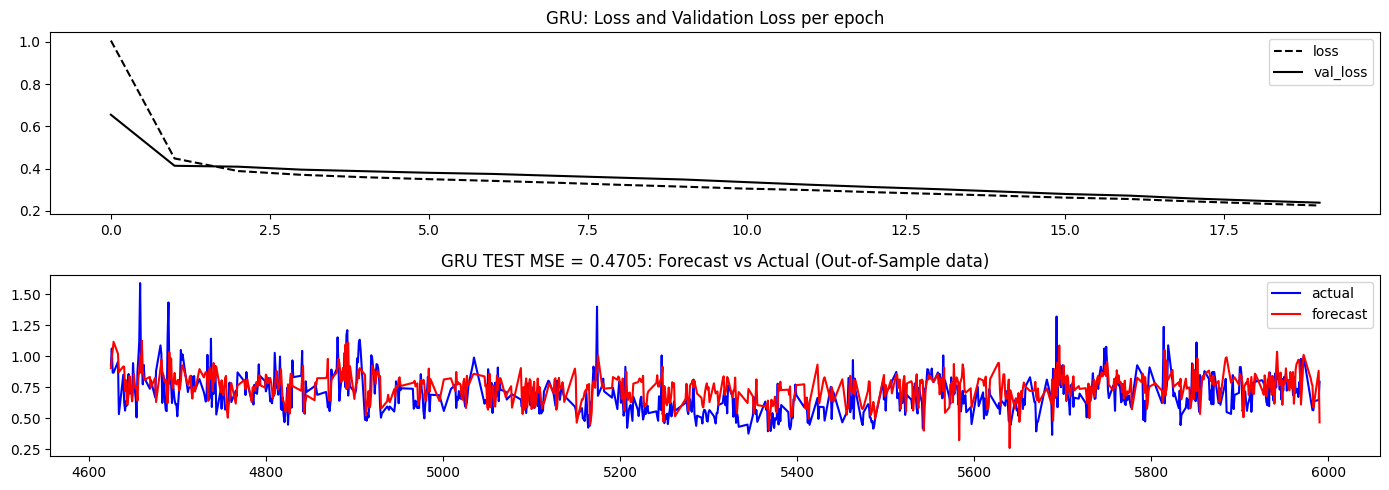

In [48]:

si_gru, history_a_gru = train_model_pt('GRU', **params_si)



## There is more


In [49]:

n_hidden = 32
input_size = x_train_si.shape[1]
n_layers = 1
output = 1


In [50]:

model_lstm_seq = torch.nn.Sequential(
    torch.nn.LSTM(input_size, n_hidden, n_layers),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(n_hidden, output)
)


In [51]:

model_gru_seq = torch.nn.Sequential(
    torch.nn.GRU(input_size, n_hidden, n_layers),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(n_hidden, output)
)


In [52]:

model_lstm_seq


Sequential(
  (0): LSTM(9, 32)
  (1): Dropout(p=0.5, inplace=False)
  (2): Linear(in_features=32, out_features=1, bias=True)
)

In [53]:

model_gru_seq


Sequential(
  (0): GRU(9, 32)
  (1): Dropout(p=0.5, inplace=False)
  (2): Linear(in_features=32, out_features=1, bias=True)
)